In [180]:
import pickle
import pandas as pd
from sklearn.metrics import log_loss, auc, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import requests
import json
%matplotlib inline

In [181]:
with open('Finish_model.pkl', 'rb') as handle:
    b = pickle.load(handle)

In [125]:
data = [34, 88.39, 3, 0, 1, 1, 2.5, 0.7174, 0.6806, 23.0, 0.90, 1]

In [126]:
probabilities = b.predict_proba(data)

/Users/stef/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [128]:
probabilities[0][1]

0.84210408936773429

In [157]:
with open('DNS_model.pkl', 'rb') as handle:
    c = pickle.load(handle)

In [132]:
data2 = [34, 88.39, 3, 0, 1, 1, 2.5, 0.7174, 0.6806, 23.0, 0.90, 1, 1]

In [133]:
probability = c.predict_proba(data2)

/Users/stef/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [136]:
probability[0][1]

0.017150313608569723

In [158]:
with open('y_test.pkl', 'rb') as handle:
    y_test = pickle.load(handle)

In [159]:
with open('X_test.pkl', 'rb') as handle:
    X_test = pickle.load(handle)

In [160]:
test_proba = c.predict_proba(X_test)

In [161]:
print log_loss(y_test, test_proba)
print roc_auc_score(y_test, test_proba[:,1])

0.17529690366
0.681068365312


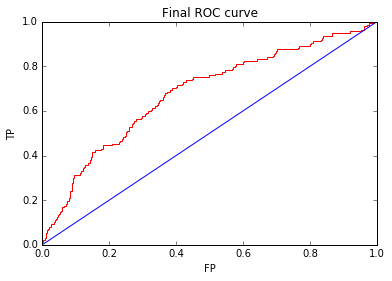

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1]) 
labels = ['fpr', 'tpr']
plt.ylabel('TP')
plt.xlabel('FP')
plt.title('Final ROC curve')
plt.plot(fpr, tpr, 'r')
X = [0, 1]
y = [0, 1]
plt.plot(X, y, 'b')

In [170]:
test2 = c.predict(X_test)
print confusion_matrix(y_test, test2)
print accuracy_score(y_test, test2)

[[3015    1]
 [ 135    2]]
0.956866476372


In [171]:
3015 + 1 + 2 + 135

3153

In [172]:
y_test.value_counts()

0    3016
1     137
Name: status_coded, dtype: int64

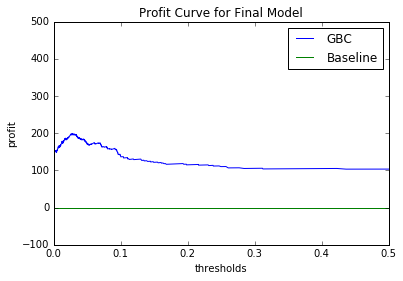

In [179]:
TPC = 250.
FPC = -100.
FNC = 0.
TNC = 100.
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
cost = (tpr * TPC) + ((1 - fpr) * TNC) + (fpr * FPC) + ((1 - tpr) * FNC)
GBcost = plt.plot(thresholds, cost, 'b', label='Gradient Boosted Classifier')
plt.axhline(0, color='g')
plt.ylabel('profit')
plt.xlabel('thresholds')
plt.title('Profit Curve for Final Model')
plt.axis([0, 0.5, -100, 500])
plt.legend(['GBC', 'Baseline'], loc=1)
plt.show()

In [198]:
json_request = [{"name":"age","value":"34"},{"name":"gender","value":"Female"},{"name":"race","value":"Bear 100"}]

In [201]:
request_df = pd.DataFrame(json_request)

In [206]:
request_df['value'][2]

'Bear 100'